# ETL Movies:

## Propuesta de trabajo (requerimientos de aprobación)
Transformaciones: Para este MVP no necesitas perfección, ¡necesitas rapidez! ⏩ Vas a hacer estas, y solo estas, transformaciones a los datos:

* 1 Algunos campos, como belongs_to_collection, production_companies y otros (ver diccionario de datos) están anidados, esto es o bien tienen un diccionario o una lista como valores en cada fila, ¡deberán desanidarlos para poder y unirlos al dataset de nuevo hacer alguna de las consultas de la API! O bien buscar la manera de acceder a esos datos sin desanidarlos.✅

* 2 Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.✅

* 3 Los valores nulos del campo release date deben eliminarse.✅

* 4 De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.✅

* 5 Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.✅

* 6 Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,poster_path y homepage.✅

## Librerias necesarias:✅

In [1]:
import pandas as pd
import ast
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import pickle

## Ingesta de Datasets:✅

In [2]:
csvs_to_read = [1, 2, 3]
dfs = []
encodings = ['ANSI', 'ANSI', 'UTF-8']

for i, number in enumerate(csvs_to_read):
    df = pd.read_csv(f'D:\Data Scientist\CURSADO HENRY DTS09\PI\PI1_PT02\PI_ML_OPS_PT02\Datasets\Movies_datasets\CSVs Movies\movies_dataset_{number}.csv', encoding=encodings[i], sep=',',low_memory=False)
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df_movies = pd.concat(dfs, ignore_index=True)

# Ahora df_movies contiene todos los datos de los tres CSVs en un solo DataFrame

In [3]:
df_movies.shape

(136398, 24)

In [4]:
df_movies.drop_duplicates()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSO,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,FALSO,7.7,5415.0
1,FALSO,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,FALSO,6.9,2413.0
2,FALSO,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,FALSO,6.5,92.0
3,FALSO,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,FALSO,6.1,34.0
4,FALSO,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,FALSO,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136393,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
136394,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
136395,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
136396,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [5]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [6]:
# Configurar opciones de visualización para mostrar todo el contenido sin truncar
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas
pd.set_option('display.width', None)        # No truncar la anchura de la visualización
pd.set_option('display.max_colwidth', None) # Mostrar toda la longitud de los valores en las celdas


In [7]:
df_movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSO,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,FALSO,7.7,5415.0
1,FALSO,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844,tt0113497,en,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,FALSO,6.9,2413.0
2,FALSO,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.",11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,FALSO,6.5,92.0


In [8]:

# Restablecer opciones de visualización a los valores predeterminados
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

<Axes: >

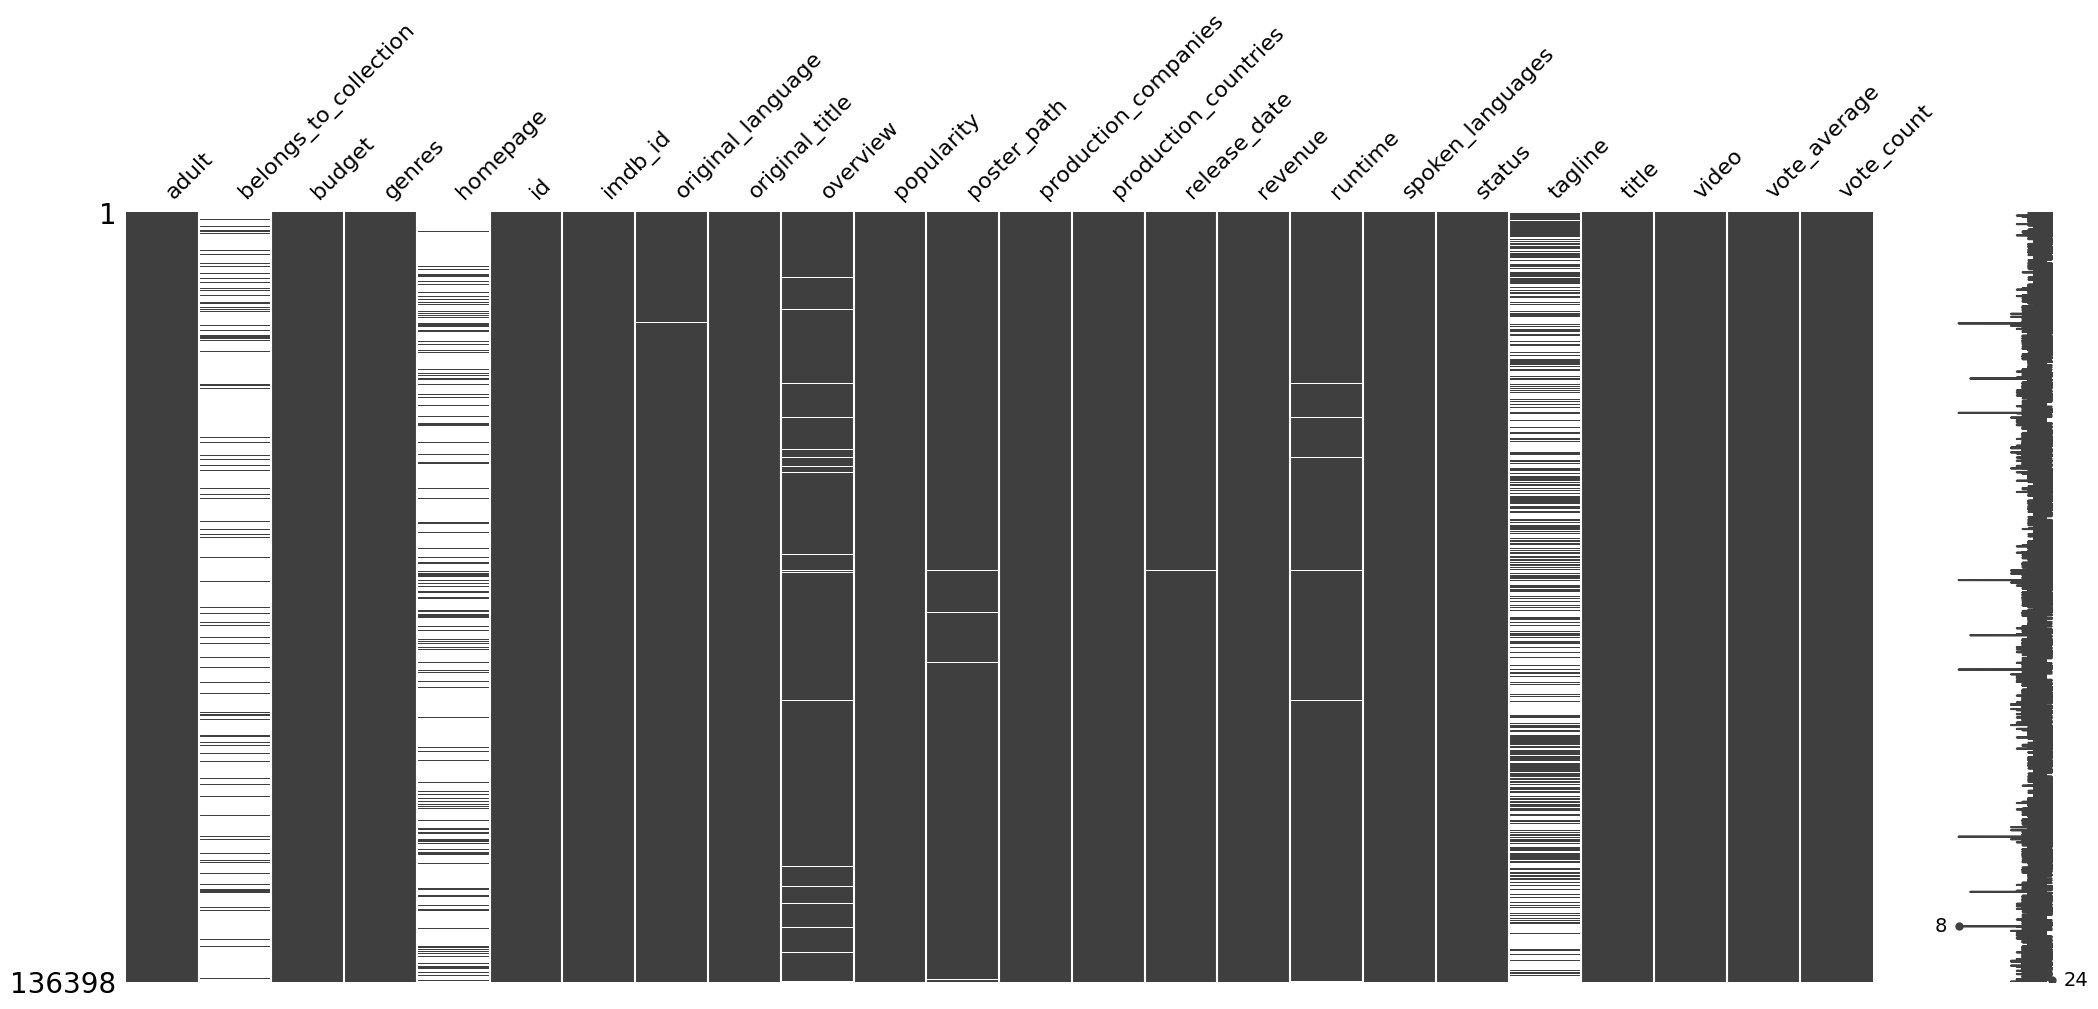

In [9]:
msno.matrix(df_movies)

## Consigna 6 Eliminar las columnas que no serán utilizadas, video, imdb_id, adult, original_title, poster_path y homepage.✅

Descarto ahora para no arrastrarlas en las transformaciones y evitar furuaas confusines.

In [10]:
# Suponiendo que ya tienes el DataFrame df_movies cargado o creado

# Lista de columnas a eliminar
columnas_a_eliminar = ['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage', 'tagline']

# Utilizamos el método drop() para eliminar las columnas
df_movies = df_movies.drop(columnas_a_eliminar, axis=1)

# Si quieres aplicar los cambios directamente en el DataFrame original sin crear una copia, puedes usar el argumento inplace=True
# df_movies.drop(columnas_a_eliminar, axis=1, inplace=True)


In [11]:
df_movies.isnull().sum()

belongs_to_collection    122916
budget                        0
genres                        0
id                            0
original_language            33
overview                   2872
popularity                   15
production_companies          9
production_countries          9
release_date                261
revenue                      18
runtime                     789
spoken_languages             18
status                      261
title                        18
vote_average                 18
vote_count                   18
dtype: int64

<Axes: >

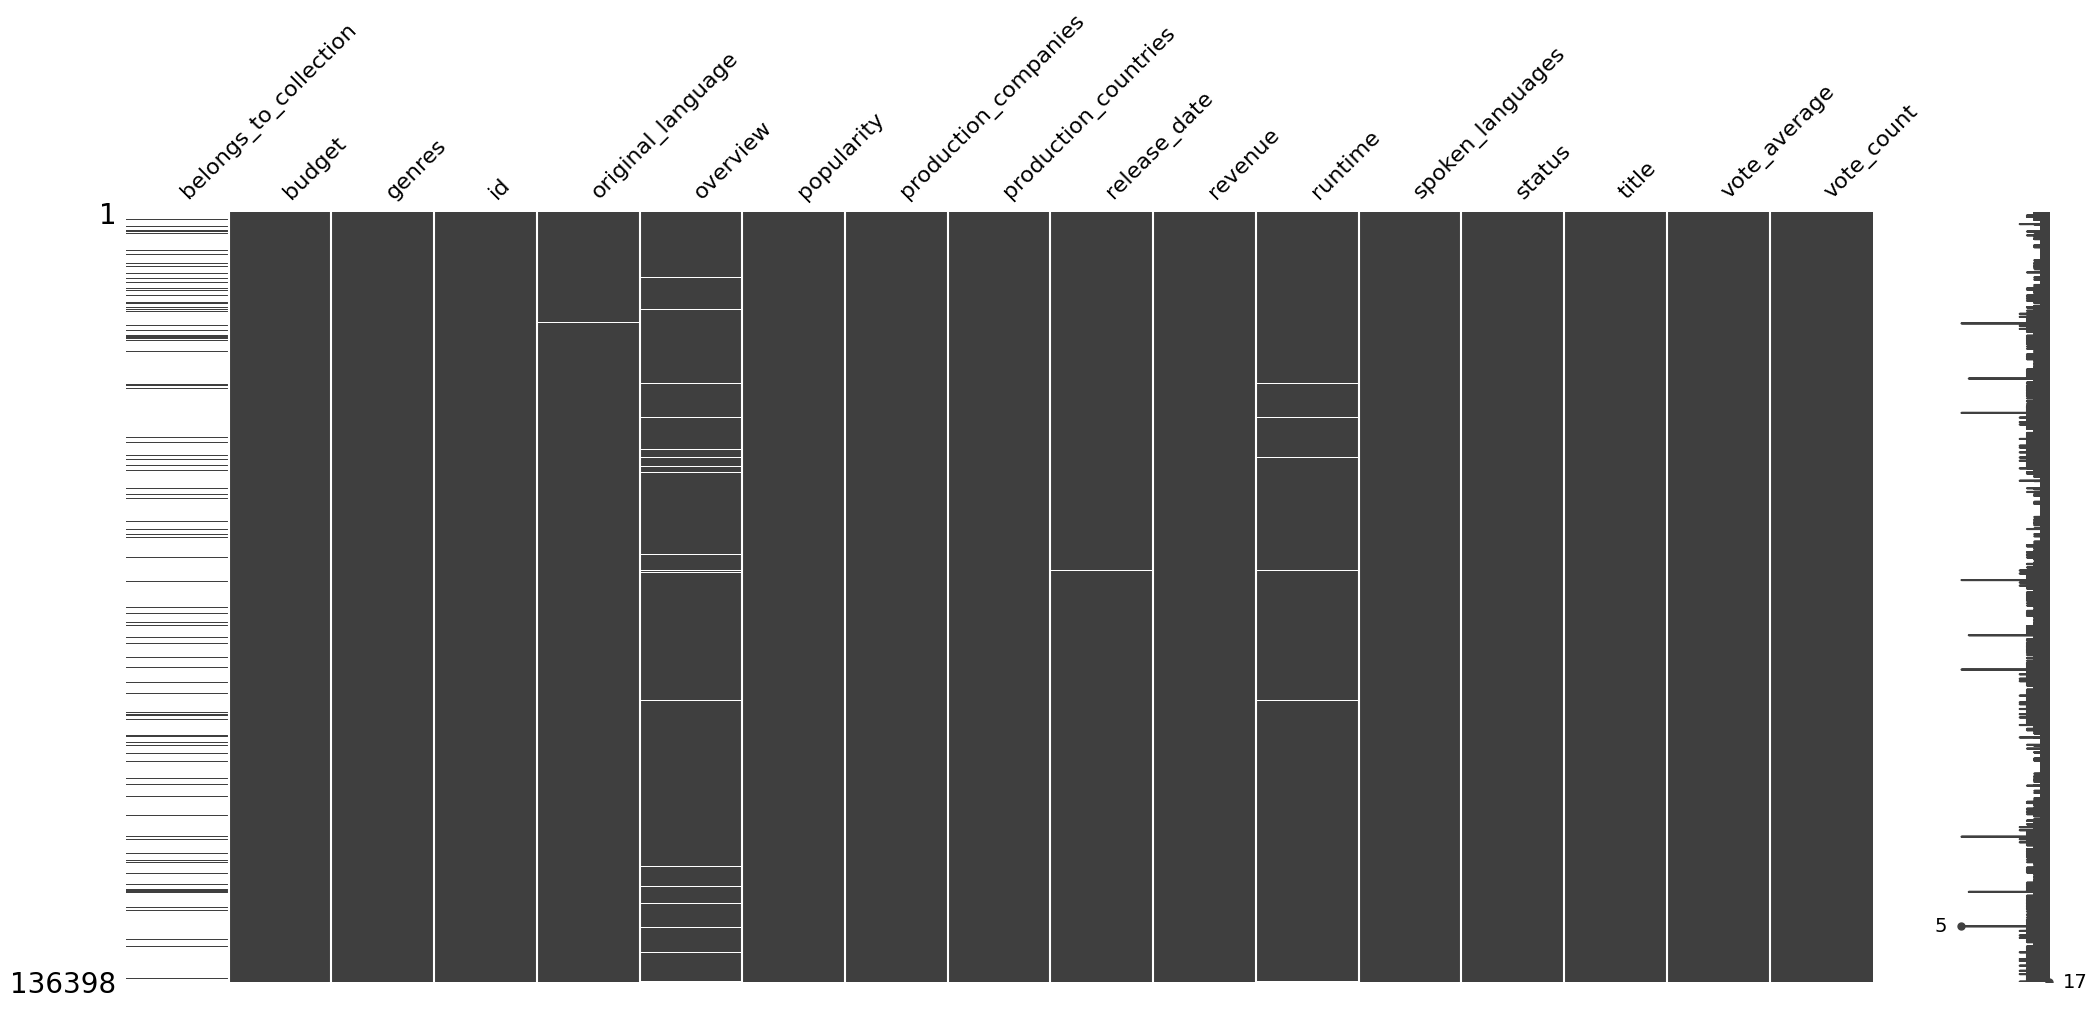

In [12]:
msno.matrix(df_movies)

In [13]:
df_movies.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0


## Estudiando las columnas diccionarios ...✅

### Franquicias ✅

In [14]:
belongs_to_collection_col = df_movies['belongs_to_collection']
belongs_to_collection_id_col = df_movies['id']


In [15]:
belongs_to_collection_col

0         {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                       NaN
2         {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                       NaN
4         {'id': 96871, 'name': 'Father of the Bride Col...
                                ...                        
136393                                                  NaN
136394                                                  NaN
136395                                                  NaN
136396                                                  NaN
136397                                                  NaN
Name: belongs_to_collection, Length: 136398, dtype: object

In [16]:
print(belongs_to_collection_id_col)

0            862
1           8844
2          15602
3          31357
4          11862
           ...  
136393    439050
136394    111109
136395     67758
136396    227506
136397    461257
Name: id, Length: 136398, dtype: object


In [17]:
iteracion = 0
df_belong_to_collection_cleaned = pd.DataFrame()
fallos = 0

for row in belongs_to_collection_col:
    # Obtener el valor de la columna 'crew' del primer registro
    collection_string = belongs_to_collection_col.iloc[iteracion]


    # Check if the value is NaN, skip the iteration if it is
    if pd.notna(collection_string):
        # Convert the string to a dictionary using ast.literal_eval
        data_dict = ast.literal_eval(collection_string)

        # Convert the dictionary to a DataFrame
        df_collection = pd.DataFrame([data_dict])

        # Use the 'iteracion' variable to fill the 'id' column in the DataFrame
        df_collection['id'] = belongs_to_collection_id_col[iteracion]

        # Unify the DataFrames using concat
        df_belong_to_collection_cleaned = pd.concat([df_belong_to_collection_cleaned, df_collection], ignore_index=True)
    
        iteracion += 1
    
    else:
        fallos += 1
        iteracion += 1

print(df_belong_to_collection_cleaned)

           id                            name  \
0         862            Toy Story Collection   
1       15602       Grumpy Old Men Collection   
2       11862  Father of the Bride Collection   
3         710           James Bond Collection   
4       21032                Balto Collection   
...       ...                             ...   
13477   24568         The Carry On Collection   
13478   19307         The Carry On Collection   
13479   21251         The Carry On Collection   
13480  460135  DC Super Hero Girls Collection   
13481  182030            Red Lotus Collection   

                            poster_path                     backdrop_path   0  
0      /7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg  /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg NaN  
1      /nLvUdqgPgm3F85NMCii9gVFUcet.jpg  /hypTnLot2z8wpFS7qwsQHW1uV8u.jpg NaN  
2      /nts4iOmNnq7GNicycMJ9pSAn204.jpg  /7qwE57OVZmMJChBpLEbJEmzUydk.jpg NaN  
3       /HORpg5CSkmeQlAolx3bKMrKgfi.jpg  /6VcVl48kNKvdXOZfJPdarlUGOsk.jpg NaN  
4      /w0Z

#### Verificacion de etapas belong_to_collection code:

In [18]:
fallos

122916

Esta ok la cantidad de fallos, muy pocas peliculas poseen saga , es decir, pertenecen a una coleccion...

In [19]:
data_dict

{'id': 200641,
 'name': 'Red Lotus Collection',
 'poster_path': '/yf9Eod9ANXyHTzDpAxz9ezgvlL4.jpg',
 'backdrop_path': '/3fhHbLeO3DqdHvgHg5szs399eBb.jpg'}

In [20]:
df_collection

,id,name,poster_path,backdrop_path
0,182030,Red Lotus Collection,/yf9Eod9ANXyHTzDpAxz9ezgvlL4.jpg,/3fhHbLeO3DqdHvgHg5szs399eBb.jpg


In [21]:
belongs_to_collection_id_col

0            862
1           8844
2          15602
3          31357
4          11862
           ...  
136393    439050
136394    111109
136395     67758
136396    227506
136397    461257
Name: id, Length: 136398, dtype: object

In [22]:
type(df_belong_to_collection_cleaned)

pandas.core.frame.DataFrame

In [23]:
df_belong_to_collection_cleaned

,id,name,poster_path,backdrop_path,0
0,862,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,NaN
1,15602,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,NaN
2,11862,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,NaN
3,710,James Bond Collection,/HORpg5CSkmeQlAolx3bKMrKgfi.jpg,/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg,NaN
4,21032,Balto Collection,/w0ZgH6Lgxt2bQYnf1ss74UvYftm.jpg,/9VM5LiJV0bGb1st1KyHA3cVnO2G.jpg,NaN
...,...,...,...,...,...
13477,24568,The Carry On Collection,/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg,/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg,NaN
13478,19307,The Carry On Collection,/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg,/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg,NaN
13479,21251,The Carry On Collection,/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg,/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg,NaN
13480,460135,DC Super Hero Girls Collection,None,None,NaN


In [24]:
df_movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0


In [25]:
df_belong_to_collection_cleaned = df_belong_to_collection_cleaned.loc[:, ['id', 'name']]


In [26]:
# Assuming df_belong_to_collection_cleaned is your DataFrame
df_belong_to_collection_cleaned.rename(columns={'name': 'collection_name'}, inplace=True)

In [27]:
df_movies.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0


In [28]:
#verifico :

verifi = df_movies[df_movies['id'] == '21251']

verifi

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
45369,"{'id': 37261, 'name': 'The Carry On Collection...",0,"[{'id': 35, 'name': 'Comedy'}]",21251,en,Captain S. Melly takes over as the new Command...,0.846154,"[{'name': 'The Rank Organisation', 'id': 364}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1976-10-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Carry On England,4.8,15.0
90835,"{'id': 37261, 'name': 'The Carry On Collection...",0,"[{'id': 35, 'name': 'Comedy'}]",21251,en,Captain S. Melly takes over as the new Command...,0.846154,"[{'name': 'The Rank Organisation', 'id': 364}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1976-10-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Carry On England,4.8,15.0
136301,"{'id': 37261, 'name': 'The Carry On Collection...",0,"[{'id': 35, 'name': 'Comedy'}]",21251,en,Captain S. Melly takes over as the new Command...,0.846154,"[{'name': 'The Rank Organisation', 'id': 364}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1976-10-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Carry On England,4.8,15.0


In [29]:

# Realizar el left join
df_movies_belong_2colection = df_movies.merge(df_belong_to_collection_cleaned, on='id', how='left')

# Supongamos que df es tu DataFrame y quieres eliminar la columna 'column_name'
df_movies_belong_2colection.drop('belongs_to_collection', axis=1, inplace=True)


# Mostrar el resultado
df_movies_belong_2colection

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,collection_name
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,Toy Story Collection
1,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,Toy Story Collection
2,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,Toy Story Collection
3,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,NaN
4,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163411,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,fa,Rising and falling between a man and woman.,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,4.0,1.0,NaN
163412,0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3.0,NaN
163413,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,3.8,6.0,NaN
163414,0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0,NaN


In [30]:
df_movies.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0


### Genres col:

In [31]:
import json
from collections import Counter
import ast
import ast # Módulo para analizar cadenas como literales de Python (necesario para convertir la cadena del diccionario a un diccionario real)

dict_cols = ['genres']

columns_to_separate = pd.DataFrame(df_movies['genres'])
columns_to_separate

,genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,"[{'id': 35, 'name': 'Comedy'}]"
...,...
136393,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
136394,"[{'id': 18, 'name': 'Drama'}]"
136395,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
136396,[]


In [32]:
# # Convertimos la cadena de diccionario a un diccionario real usando ast.literal_eval
# columns_to_separate['genres'] = columns_to_separate['genres'].apply(lambda x: ast.literal_eval(x))

# # Creamos listas para almacenar los IDs y nombres de género
# genre_ids_list = []
# genre_names_list = []

# # Iteramos a través del DataFrame y extraemos los IDs y nombres de género
# for genres_list in columns_to_separate['genres']:
#     ids = [genre['id'] for genre in genres_list]
#     names = [genre['name'] for genre in genres_list]
#     genre_ids_list.append(ids)
#     genre_names_list.append(names)

# # Creamos un nuevo DataFrame con las listas creadas
# new_df = pd.DataFrame({'genre_ids': genre_ids_list, 'genre_names': genre_names_list})

# # Unimos los IDs y nombres de género en una sola cadena separada por comas
# df_movies['genre_ids'] = new_df['genre_ids'].apply(lambda x: ', '.join(map(str, x)))
# df_movies['genre_names'] = new_df['genre_names'].apply(lambda x: ', '.join(x))

# print(df_movies.head(10))


In [33]:
df_movies

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136393,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,fa,Rising and falling between a man and woman.,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,4.0,1.0
136394,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3.0
136395,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,3.8,6.0
136396,NaN,0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0


In [34]:
# Convertimos la cadena de diccionario a un diccionario real usando ast.literal_eval
columns_to_separate['genres'] = columns_to_separate['genres'].apply(lambda x: ast.literal_eval(x))

# Creamos listas para almacenar los IDs y nombres de género
genre_ids_list = []
genre_names_list = []

# Iteramos a través del DataFrame y extraemos los IDs y nombres de género
for genres_list in columns_to_separate['genres']:
    ids = [genre['id'] for genre in genres_list]
    names = [genre['name'] for genre in genres_list]
    genre_ids_list.append(ids)
    genre_names_list.append(names)

# Creamos un nuevo DataFrame con las listas creadas
new_df = pd.DataFrame({'genre_ids': genre_ids_list, 'genre_names': genre_names_list})

# Combinamos el nuevo DataFrame con el DataFrame original
df_movies = pd.concat([df_movies, new_df], axis=1)

# Eliminamos las columnas originales con las cadenas separadas por comas
df_movies.drop(columns=['genres'], inplace=True)

print(df_movies.head(10))

                               belongs_to_collection    budget     id  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000    862   
1                                                NaN  65000000   8844   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0  15602   
3                                                NaN  16000000  31357   
4  {'id': 96871, 'name': 'Father of the Bride Col...         0  11862   
5                                                NaN  60000000    949   
6                                                NaN  58000000  11860   
7                                                NaN         0  45325   
8                                                NaN  35000000   9091   
9  {'id': 645, 'name': 'James Bond Collection', '...  58000000    710   

  original_language                                           overview  \
0                en  Led by Woody, Andy's toys live happily in his ...   
1                en  When siblings Judy and Pete

In [35]:
df_movies

,belongs_to_collection,budget,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,genre_ids,genre_names
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[16, 35, 10751]","[Animation, Comedy, Family]"
1,NaN,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[12, 14, 10751]","[Adventure, Fantasy, Family]"
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[10749, 35]","[Romance, Comedy]"
3,NaN,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,"[35, 18, 10749]","[Comedy, Drama, Romance]"
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,[35],[Comedy]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136393,NaN,0,439050,fa,Rising and falling between a man and woman.,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,4.0,1.0,"[18, 10751]","[Drama, Family]"
136394,NaN,0,111109,tl,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3.0,[18],[Drama]
136395,NaN,0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,3.8,6.0,"[28, 18, 53]","[Action, Drama, Thriller]"
136396,NaN,0,227506,en,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0,[],[]


### Production_companies col:

In [36]:
dict_cols = ['production_companies']

columns_to_separate = pd.DataFrame(df_movies['production_companies'])
columns_to_separate

,production_companies
0,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
3,[{'name': 'Twentieth Century Fox Film Corporat...
4,"[{'name': 'Sandollar Productions', 'id': 5842}..."
...,...
136393,[]
136394,"[{'name': 'Sine Olivia', 'id': 19653}]"
136395,"[{'name': 'American World Pictures', 'id': 6165}]"
136396,"[{'name': 'Yermoliev', 'id': 88753}]"


In [37]:
# Paso 1: Manejar los valores 'NaN' en la columna 'production_companies'
df_movies['production_companies'] = df_movies['production_companies'].fillna('[]')

# Paso 2: Convertir la cadena de diccionario a un diccionario real usando ast.literal_eval
def parse_production_companies(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df_movies['production_companies'] = df_movies['production_companies'].apply(parse_production_companies)

# Paso 3: Extraer la información del diccionario y crear dos nuevas listas
ids_list = []
names_list = []

for row in df_movies['production_companies']:
    if isinstance(row, list) and len(row) > 0:  # Verificar que haya una lista válida en la fila
        ids = []
        names = []
        for entry in row:
            if 'id' in entry and 'name' in entry:
                ids.append(entry['id'])
                names.append(entry['name'])
        ids_list.append(ids)
        names_list.append(names)
    else:
        ids_list.append([])  # Utilizar una lista vacía para indicar datos faltantes
        names_list.append([])  # Utilizar una lista vacía para indicar datos faltantes

# Paso 4: Crear un nuevo DataFrame con los valores separados por listas en las columnas
df_new = pd.DataFrame({'production_companies_ids': ids_list, 'production_companies_nombres': names_list})

# Combinar el nuevo DataFrame con el DataFrame original
df_movies = pd.concat([df_movies, df_new], axis=1)

# Eliminar la columna original con la lista de diccion


In [38]:
# Ver el resultado
print(df_movies.head(10))
print(df_new)

                               belongs_to_collection    budget     id  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000    862   
1                                                NaN  65000000   8844   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0  15602   
3                                                NaN  16000000  31357   
4  {'id': 96871, 'name': 'Father of the Bride Col...         0  11862   
5                                                NaN  60000000    949   
6                                                NaN  58000000  11860   
7                                                NaN         0  45325   
8                                                NaN  35000000   9091   
9  {'id': 645, 'name': 'James Bond Collection', '...  58000000    710   

  original_language                                           overview  \
0                en  Led by Woody, Andy's toys live happily in his ...   
1                en  When siblings Judy and Pete

In [39]:
df_movies = df_movies.drop('production_companies', axis=1)

In [40]:
df_movies

,belongs_to_collection,budget,id,original_language,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,genre_ids,genre_names,production_companies_ids,production_companies_nombres
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[16, 35, 10751]","[Animation, Comedy, Family]",[3],[Pixar Animation Studios]
1,NaN,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[12, 14, 10751]","[Adventure, Fantasy, Family]","[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[10749, 35]","[Romance, Comedy]","[6194, 19464]","[Warner Bros., Lancaster Gate]"
3,NaN,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,"[35, 18, 10749]","[Comedy, Drama, Romance]",[306],[Twentieth Century Fox Film Corporation]
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,[35],[Comedy],"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136393,NaN,0,439050,fa,Rising and falling between a man and woman.,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,4.0,1.0,"[18, 10751]","[Drama, Family]",[],[]
136394,NaN,0,111109,tl,An artist struggles to finish his work while a...,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3.0,[18],[Drama],[19653],[Sine Olivia]
136395,NaN,0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,3.8,6.0,"[28, 18, 53]","[Action, Drama, Thriller]",[6165],[American World Pictures]
136396,NaN,0,227506,en,"In a small town live two brothers, one a minis...",0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0,[],[],[88753],[Yermoliev]


In [41]:
#_______________________________________________________________________

### Production_countries col:

In [42]:
dict_cols = ['production_countries']

columns_to_separate = pd.DataFrame(df_movies['production_countries'])
columns_to_separate

,production_countries
0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
1,"[{'iso_3166_1': 'US', 'name': 'United States o..."
2,"[{'iso_3166_1': 'US', 'name': 'United States o..."
3,"[{'iso_3166_1': 'US', 'name': 'United States o..."
4,"[{'iso_3166_1': 'US', 'name': 'United States o..."
...,...
136393,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]"
136394,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]"
136395,"[{'iso_3166_1': 'US', 'name': 'United States o..."
136396,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]"


In [43]:
# Paso 1: Manejar los valores 'NaN' en la columna 'production_countries'
df_movies['production_countries'] = df_movies['production_countries'].fillna('[]')

# Paso 2: Convertir la cadena de diccionario a un diccionario real usando ast.literal_eval
def parse_production_countries(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df_movies['production_countries'] = df_movies['production_countries'].apply(parse_production_countries)

# Paso 3: Extraer la información del diccionario y crear dos nuevas listas
iso_list = []
names_list = []

for row in df_movies['production_countries']:
    if isinstance(row, list) and len(row) > 0:  # Verificar que haya una lista válida en la fila
        isos = []
        names = []
        for entry in row:
            if 'iso_3166_1' in entry and 'name' in entry:
                isos.append(entry['iso_3166_1'])
                names.append(entry['name'])
        iso_list.append(isos)
        names_list.append(names)
    else:
        iso_list.append([])  # Utilizar una lista vacía para indicar datos faltantes
        names_list.append([])  # Utilizar una lista vacía para indicar datos faltantes

# Paso 4: Crear un nuevo DataFrame con los valores separados por listas en las columnas
df_new = pd.DataFrame({'iso_codes': iso_list, 'country_names': names_list})

# Combinar el nuevo DataFrame con el DataFrame original
df_movies = pd.concat([df_movies, df_new], axis=1)

# Eliminar la columna original con la lista de diccionarios
df_movies.drop(columns=['production_countries'], inplace=True)

# Imprimir el resultado
print(df_movies.head(10))


                               belongs_to_collection    budget     id  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000    862   
1                                                NaN  65000000   8844   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0  15602   
3                                                NaN  16000000  31357   
4  {'id': 96871, 'name': 'Father of the Bride Col...         0  11862   
5                                                NaN  60000000    949   
6                                                NaN  58000000  11860   
7                                                NaN         0  45325   
8                                                NaN  35000000   9091   
9  {'id': 645, 'name': 'James Bond Collection', '...  58000000    710   

  original_language                                           overview  \
0                en  Led by Woody, Andy's toys live happily in his ...   
1                en  When siblings Judy and Pete

In [44]:
df_movies['country_names'].head(30)

0                            [United States of America]
1                            [United States of America]
2                            [United States of America]
3                            [United States of America]
4                            [United States of America]
5                            [United States of America]
6                   [Germany, United States of America]
7                            [United States of America]
8                            [United States of America]
9            [United Kingdom, United States of America]
10                           [United States of America]
11                   [France, United States of America]
12                           [United States of America]
13                           [United States of America]
14    [France, Germany, Italy, United States of Amer...
15                   [France, United States of America]
16           [United Kingdom, United States of America]
17                           [United States of A

### Spoken_lenguages col:

In [45]:
dict_cols = ['spoken_languages']

columns_to_separate = pd.DataFrame(df_movies['spoken_languages'])
columns_to_separate

,spoken_languages
0,"[{'iso_639_1': 'en', 'name': 'English'}]"
1,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,"[{'iso_639_1': 'en', 'name': 'English'}]"
3,"[{'iso_639_1': 'en', 'name': 'English'}]"
4,"[{'iso_639_1': 'en', 'name': 'English'}]"
...,...
136393,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]"
136394,"[{'iso_639_1': 'tl', 'name': ''}]"
136395,"[{'iso_639_1': 'en', 'name': 'English'}]"
136396,[]


In [46]:
# Paso 1: Manejar los valores 'NaN' en la columna 'spoken_languages'
df_movies['spoken_languages'] = df_movies['spoken_languages'].fillna('[]')

# Paso 2: Convertir la cadena de diccionario a un diccionario real usando ast.literal_eval
def parse_spoken_languages(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df_movies['spoken_languages'] = df_movies['spoken_languages'].apply(parse_spoken_languages)

# Paso 3: Extraer la información del diccionario y crear dos nuevas listas
iso_list = []
language_names_list = []

for row in df_movies['spoken_languages']:
    if isinstance(row, list) and len(row) > 0:  # Verificar que haya una lista válida en la fila
        isos = []
        language_names = []
        for entry in row:
            if 'iso_639_1' in entry and 'name' in entry:
                isos.append(entry['iso_639_1'])
                language_names.append(entry['name'])
        iso_list.append(isos)
        language_names_list.append(language_names)
    else:
        iso_list.append([])  # Utilizar una lista vacía para indicar datos faltantes
        language_names_list.append([])  # Utilizar una lista vacía para indicar datos faltantes

# Paso 4: Crear un nuevo DataFrame con los valores separados por listas en las columnas
df_new = pd.DataFrame({'iso_language_codes': iso_list, 'language_names': language_names_list})

# Combinar el nuevo DataFrame con el DataFrame original
df_movies = pd.concat([df_movies, df_new], axis=1)

# Eliminar la columna original con la lista de diccionarios
df_movies.drop(columns=['spoken_languages'], inplace=True)

# Imprimir el resultado
print(df_movies.head(10))


                               belongs_to_collection    budget     id  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000    862   
1                                                NaN  65000000   8844   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0  15602   
3                                                NaN  16000000  31357   
4  {'id': 96871, 'name': 'Father of the Bride Col...         0  11862   
5                                                NaN  60000000    949   
6                                                NaN  58000000  11860   
7                                                NaN         0  45325   
8                                                NaN  35000000   9091   
9  {'id': 645, 'name': 'James Bond Collection', '...  58000000    710   

  original_language                                           overview  \
0                en  Led by Woody, Andy's toys live happily in his ...   
1                en  When siblings Judy and Pete

In [47]:
df_movies[['iso_language_codes','language_names']].head(10)

,iso_language_codes,language_names
0,[en],[English]
1,"[en, fr]","[English, Français]"
2,[en],[English]
3,[en],[English]
4,[en],[English]
5,"[en, es]","[English, Español]"
6,"[fr, en]","[Français, English]"
7,"[en, de]","[English, Deutsch]"
8,[en],[English]
9,"[en, ru, es]","[English, P??????, Español]"


In [48]:
df_movies.head()

,belongs_to_collection,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,vote_average,vote_count,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,...,7.7,5415.0,"[16, 35, 10751]","[Animation, Comedy, Family]",[3],[Pixar Animation Studios],[US],[United States of America],[en],[English]
1,NaN,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,...,6.9,2413.0,"[12, 14, 10751]","[Adventure, Fantasy, Family]","[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co...",[US],[United States of America],"[en, fr]","[English, Français]"
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,...,6.5,92.0,"[10749, 35]","[Romance, Comedy]","[6194, 19464]","[Warner Bros., Lancaster Gate]",[US],[United States of America],[en],[English]
3,NaN,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,...,6.1,34.0,"[35, 18, 10749]","[Comedy, Drama, Romance]",[306],[Twentieth Century Fox Film Corporation],[US],[United States of America],[en],[English]
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,...,5.7,173.0,[35],[Comedy],"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]",[US],[United States of America],[en],[English]


#### Explorando un poco mas los Spoken languages:

In [49]:
# listado_df = pd.DataFrame({
#     'iso_language_codes': df_movies['iso_language_codes'],
#     'language_names': df_movies['language_names']
# })


In [50]:
# # Dividir los valores separados por comas en nuevas filas
# listado_df['iso_language_codes'] = listado_df['iso_language_codes'].str.split(',')
# listado_df['language_names'] = listado_df['language_names'].str.split(',')

# # Crear una nueva columna para contar las repeticiones
# listado_df['count'] = 1

# # Agrupar por los valores únicos en 'iso_language_codes' y 'language_names' y sumar los conteos
# result = listado_df.explode('iso_language_codes').explode('language_names').groupby(['iso_language_codes', 'language_names'], as_index=False)['count'].sum()

# # Ordenar por la columna 'count' de manera descendente
# result = result.sort_values(by='count', ascending=False)

# # Mostrar los resultados
# print(result)

In [51]:
# result.tail(5)

## Continue with cleaning:✅

In [52]:
df_movies.head()

,belongs_to_collection,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,vote_average,vote_count,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,...,7.7,5415.0,"[16, 35, 10751]","[Animation, Comedy, Family]",[3],[Pixar Animation Studios],[US],[United States of America],[en],[English]
1,NaN,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,...,6.9,2413.0,"[12, 14, 10751]","[Adventure, Fantasy, Family]","[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co...",[US],[United States of America],"[en, fr]","[English, Français]"
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,...,6.5,92.0,"[10749, 35]","[Romance, Comedy]","[6194, 19464]","[Warner Bros., Lancaster Gate]",[US],[United States of America],[en],[English]
3,NaN,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,...,6.1,34.0,"[35, 18, 10749]","[Comedy, Drama, Romance]",[306],[Twentieth Century Fox Film Corporation],[US],[United States of America],[en],[English]
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,...,5.7,173.0,[35],[Comedy],"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]",[US],[United States of America],[en],[English]


<Axes: >

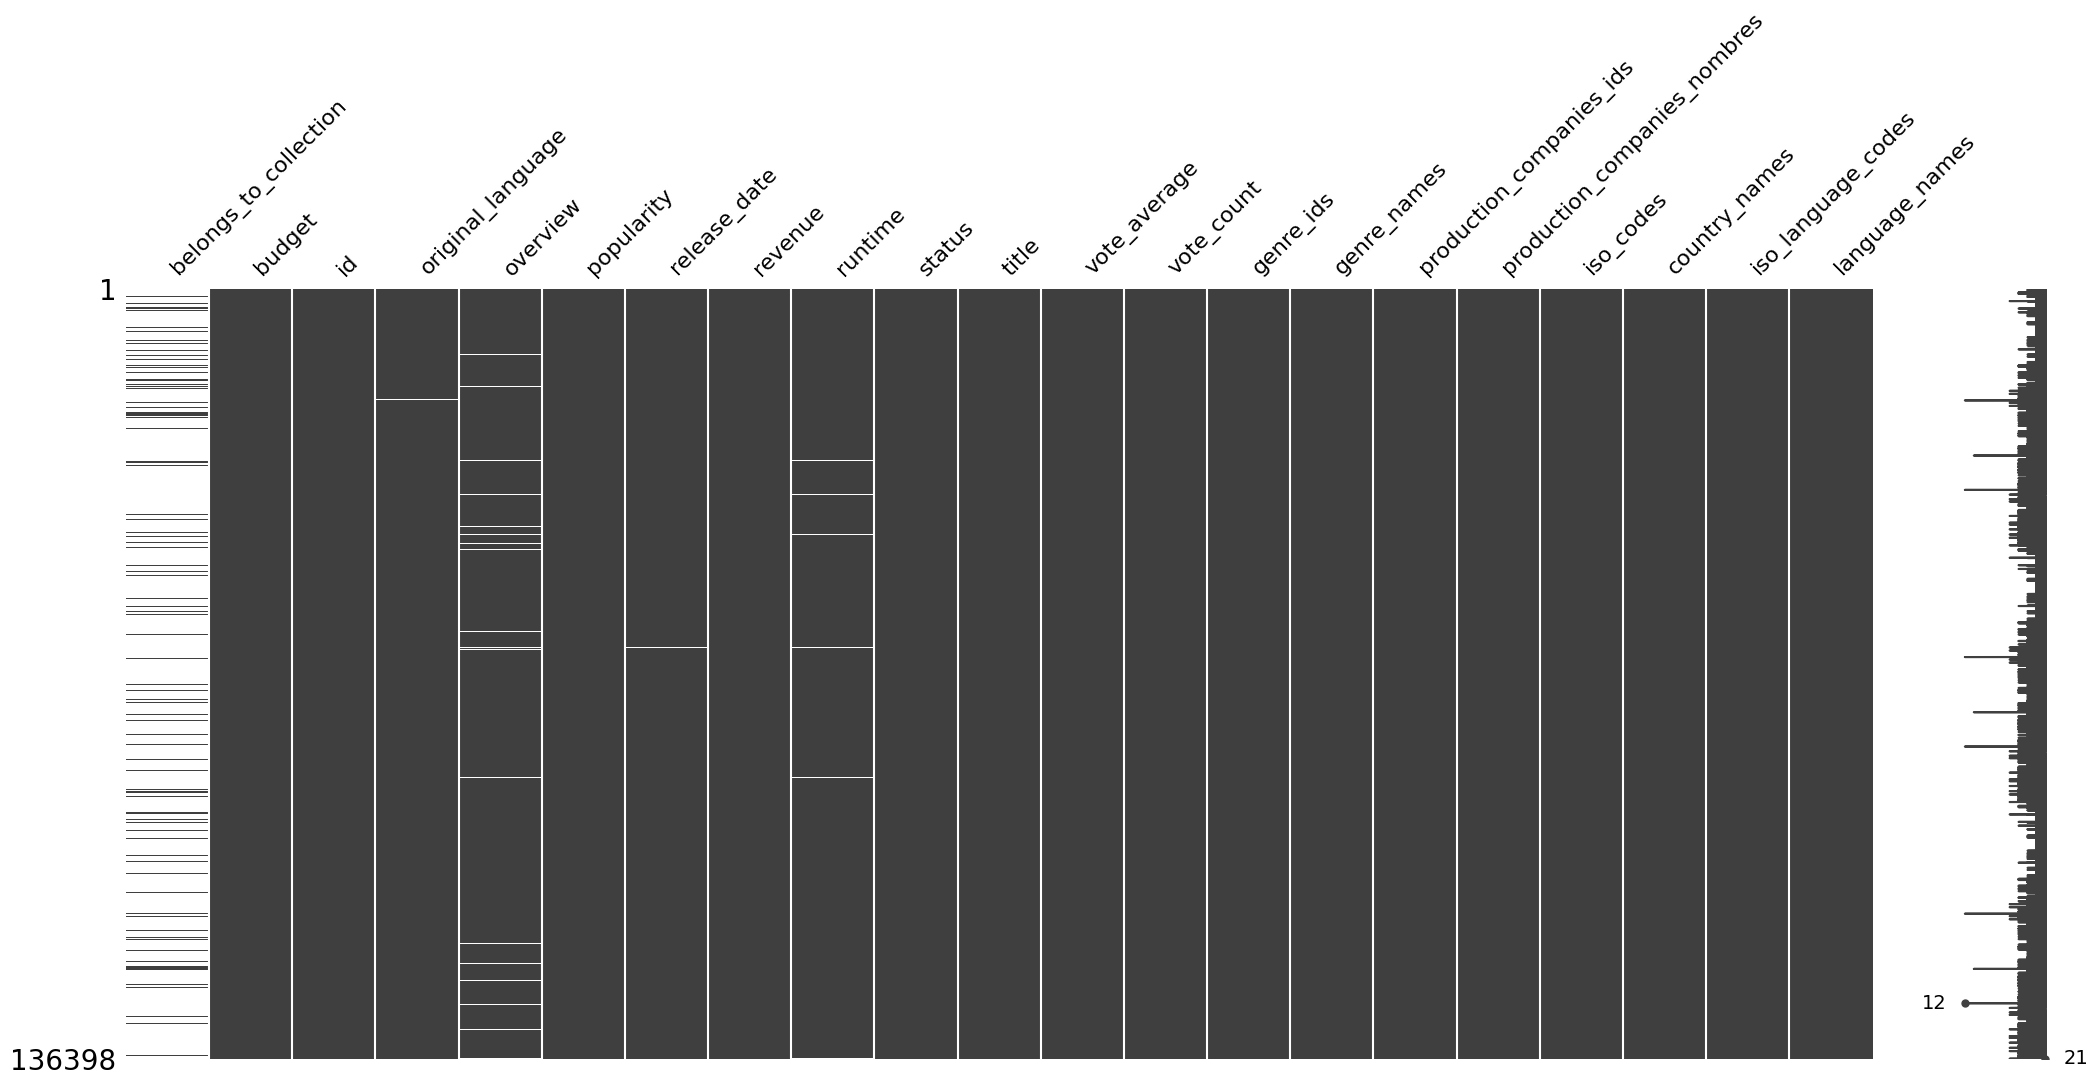

In [53]:
msno.matrix(df_movies)

In [54]:
df_movies.isnull().sum()

belongs_to_collection           122916
budget                               0
id                                   0
original_language                   33
overview                          2872
popularity                          15
release_date                       261
revenue                             18
runtime                            789
status                             261
title                               18
vote_average                        18
vote_count                          18
genre_ids                            0
genre_names                          0
production_companies_ids             0
production_companies_nombres         0
iso_codes                            0
country_names                        0
iso_language_codes                   0
language_names                       0
dtype: int64

### Rescatando algunos valores...

In [55]:
df_movies.loc[:, 'original_language'] = df_movies['original_language'].fillna(df_movies['language_names'])
df_movies.loc[:, 'overview'] = df_movies['overview'].fillna("")
df_movies.loc[:, 'popularity'] = df_movies['popularity'].fillna(0)
df_movies['release_date'] = df_movies['release_date'].fillna(pd.NaT)


df_movies.loc[:, 'status'] = df_movies['status'].fillna('Released')
df_movies.loc[:, 'title'] = df_movies['title'].fillna('Unknown')
df_movies.loc[:, 'vote_average'] = df_movies['vote_average'].fillna(0)
df_movies.loc[:, 'vote_count'] = df_movies['vote_count'].fillna(0)


In [56]:
df_movies.isnull().sum()

belongs_to_collection           122916
budget                               0
id                                   0
original_language                    0
overview                             0
popularity                           0
release_date                       261
revenue                             18
runtime                            789
status                               0
title                                0
vote_average                         0
vote_count                           0
genre_ids                            0
genre_names                          0
production_companies_ids             0
production_companies_nombres         0
iso_codes                            0
country_names                        0
iso_language_codes                   0
language_names                       0
dtype: int64

#### Rescatando buget

In [57]:
print((df_movies.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136398 entries, 0 to 136397
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   belongs_to_collection         13482 non-null   object 
 1   budget                        136398 non-null  object 
 2   id                            136398 non-null  object 
 3   original_language             136398 non-null  object 
 4   overview                      136398 non-null  object 
 5   popularity                    136398 non-null  object 
 6   release_date                  136137 non-null  object 
 7   revenue                       136380 non-null  float64
 8   runtime                       135609 non-null  float64
 9   status                        136398 non-null  object 
 10  title                         136398 non-null  object 
 11  vote_average                  136398 non-null  float64
 12  vote_count                    136398 non-nul

##### Relleno valores = 0 por la media de todos aquellos valores no nulos de la columna buguet ya que teniamos muchos nan y 0.

In [58]:
columnas_a_procesar = ['budget', 'revenue','runtime']
for col in columnas_a_procesar:
    # Paso 1: Convertir la columna a tipo numérico (float)
    df_movies[col] = pd.to_numeric(df_movies[col], errors='coerce')
    
    # Paso 2: Calcular la media de todos los valores no nulos
    media_no_nulos = df_movies[col].mean(skipna=True)
    
   
    # Paso 3: Reemplazar los valores menores a 1000 por la media calculada
    df_movies.loc[df_movies[col] < (media_no_nulos*0.10) , col] = media_no_nulos


_________________________________________________________

## Some previus Transformations for future dtype assignement...✅

In [59]:
# Convert all text data to lower case
df_movies = df_movies.applymap(lambda x: x.lower() if isinstance(x, str) else x)

<Axes: ylabel='budget'>

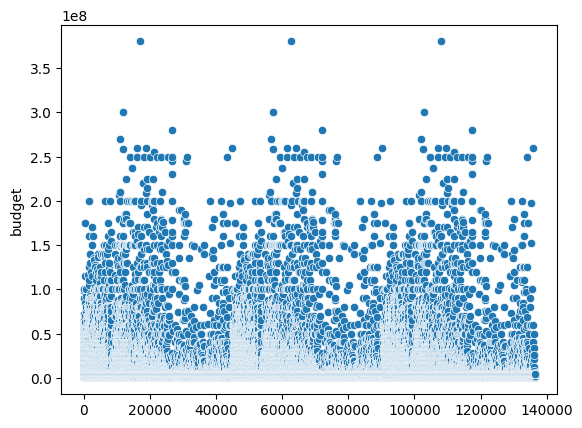

In [60]:
sns.scatterplot(df_movies['budget'])

### To Date format...

In [61]:
# Assuming df_movies is your DataFrame
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], format='%Y-%m-%d', errors='coerce')

# Count the number of errors (non-numeric values) in the 'revenue' column
num_errors = df_movies['revenue'].isna().sum()
df_movies['release_date'] = df_movies['release_date'].dropna()
print(f"Number of errors during coercion: {num_errors}")

Number of errors during coercion: 18


### Por consigna Agregado de columna release_year:

In [62]:
df_movies['release_year'] = df_movies['release_date'].dt.year

### To Numeric...

In [63]:
list_column = ['id','popularity','revenue','runtime','vote_average','vote_count','release_year']
for column in list_column:

    df_movies[column] = pd.to_numeric(df_movies[column], errors='coerce')

    # Count the number of errors (non-numeric values) in the 'revenue' column
    num_errors = df_movies[column].isna().sum()

    if num_errors > 0:
        df_movies[column] = df_movies[column].fillna(0)

    print(f"Number of errors during coercion {column}: {num_errors}")


Number of errors during coercion id: 9
Number of errors during coercion popularity: 3
Number of errors during coercion revenue: 18
Number of errors during coercion runtime: 789
Number of errors during coercion vote_average: 0
Number of errors during coercion vote_count: 0
Number of errors during coercion release_year: 270


__________________________________________________________________________________________

###  Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.✅

In [64]:
## pendiente

df_movies ['return'] = df_movies['revenue']/df_movies['budget']

In [65]:
# Establecer en 0 los valores infinitos (inf) o NaN en una columna específica
columna_a_ajustar = 'return'
df_movies[columna_a_ajustar] = df_movies[columna_a_ajustar].replace([np.inf, np.nan], 0)


In [66]:
df_movies

,belongs_to_collection,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return
0,"{'id': 10194, 'name': 'toy story collection', ...",3.000000e+07,862.0,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,3.735540e+08,81.0,released,...,"[16, 35, 10751]","[Animation, Comedy, Family]",[3],[Pixar Animation Studios],[US],[United States of America],[en],[English],1995.0,12.451801
1,NaN,6.500000e+07,8844.0,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,2.627972e+08,104.0,released,...,"[12, 14, 10751]","[Adventure, Fantasy, Family]","[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co...",[US],[United States of America],"[en, fr]","[English, Français]",1995.0,4.043035
2,"{'id': 119050, 'name': 'grumpy old men collect...",4.224579e+06,15602.0,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,1.120935e+07,101.0,released,...,"[10749, 35]","[Romance, Comedy]","[6194, 19464]","[Warner Bros., Lancaster Gate]",[US],[United States of America],[en],[English],1995.0,2.653365
3,NaN,1.600000e+07,31357.0,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,8.145216e+07,127.0,released,...,"[35, 18, 10749]","[Comedy, Drama, Romance]",[306],[Twentieth Century Fox Film Corporation],[US],[United States of America],[en],[English],1995.0,5.090760
4,"{'id': 96871, 'name': 'father of the bride col...",4.224579e+06,11862.0,en,just when george banks has recovered from his ...,8.387519,1995-02-10,7.657891e+07,106.0,released,...,[35],[Comedy],"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]",[US],[United States of America],[en],[English],1995.0,18.126993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136393,NaN,4.224579e+06,439050.0,fa,rising and falling between a man and woman.,0.072051,NaT,1.120935e+07,90.0,released,...,"[18, 10751]","[Drama, Family]",[],[],[IR],[Iran],[fa],[فارسی],0.0,2.653365
136394,NaN,4.224579e+06,111109.0,tl,an artist struggles to finish his work while a...,0.178241,2011-11-17,1.120935e+07,360.0,released,...,[18],[Drama],[19653],[Sine Olivia],[PH],[Philippines],[tl],[],2011.0,2.653365
136395,NaN,4.224579e+06,67758.0,en,"when one of her hits goes wrong, a professiona...",0.903007,2003-08-01,1.120935e+07,90.0,released,...,"[28, 18, 53]","[Action, Drama, Thriller]",[6165],[American World Pictures],[US],[United States of America],[en],[English],2003.0,2.653365
136396,NaN,4.224579e+06,227506.0,en,"in a small town live two brothers, one a minis...",0.003503,1917-10-21,1.120935e+07,87.0,released,...,[],[],[88753],[Yermoliev],[RU],[Russia],[],[],1917.0,2.653365


In [67]:
df_movies['return'].mean()

3.0576591935134094

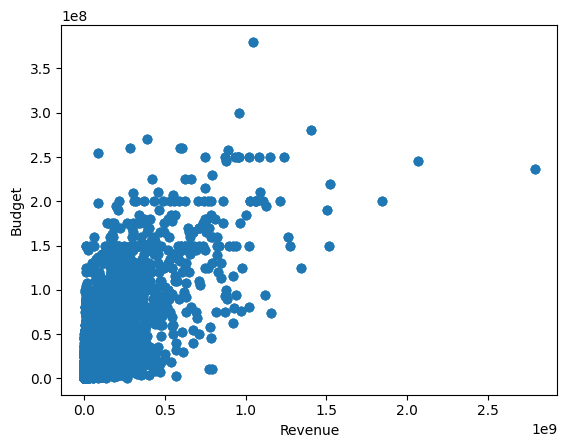

In [68]:
# Set up the figure and axis for the scatter plot
fig, ax = plt.subplots()

# Create the scatter plot
ax.scatter(df_movies['revenue'], df_movies['budget'])

# Set labels for each axis
ax.set_xlabel('Revenue')
ax.set_ylabel('Budget')

# Show the plot
plt.show()

## Asignacion de tipos de dato:✅

In [69]:
# Especificar los tipos de dato para cada columna
data_types = {
    'budget': float,
    'id': int,
    'original_language': str,
    'overview': str,
    'popularity': float,
    'release_date': 'datetime64[ns]',
    'revenue': int,
    'runtime': int,
    'status': str,
    'title': str,
    'vote_average': float,
    'vote_count': int,
    'genre_ids': str,
    'genre_names': str,
    'production_companies_ids': str,
    'production_companies_nombres': str,
    'iso_codes': str,
    'country_names': str,
    'iso_language_codes': str,
    'language_names': str,
    'release_year': int,
    'return': float,
    
}

# Asignar los tipos de dato al DataFrame
df_movies = df_movies.astype(data_types)

# Imprimir el DataFrame con los tipos de dato actualizados
print(df_movies.dtypes)

belongs_to_collection                   object
budget                                 float64
id                                       int32
original_language                       object
overview                                object
popularity                             float64
release_date                    datetime64[ns]
revenue                                  int32
runtime                                  int32
status                                  object
title                                   object
vote_average                           float64
vote_count                               int32
genre_ids                               object
genre_names                             object
production_companies_ids                object
production_companies_nombres            object
iso_codes                               object
country_names                           object
iso_language_codes                      object
language_names                          object
release_year 

## Producto:✅

In [70]:
# sns.pairplot(df_movies)

In [71]:

# Convertir todos los elementos del DataFrame a minúsculas
df_movies = df_movies.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [72]:
df_movies = df_movies.drop_duplicates()

In [73]:
df_movies.head(10)

,belongs_to_collection,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return
0,"{'id': 10194, 'name': 'toy story collection', ...",3.000000e+07,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,...,"[16, 35, 10751]","['animation', 'comedy', 'family']",[3],['pixar animation studios'],['us'],['united states of america'],['en'],['english'],1995,12.451801
1,NaN,6.500000e+07,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,...,"[12, 14, 10751]","['adventure', 'fantasy', 'family']","[559, 2550, 10201]","['tristar pictures', 'teitler film', 'intersco...",['us'],['united states of america'],"['en', 'fr']","['english', 'français']",1995,4.043035
2,"{'id': 119050, 'name': 'grumpy old men collect...",4.224579e+06,15602,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,11209348,101,released,...,"[10749, 35]","['romance', 'comedy']","[6194, 19464]","['warner bros.', 'lancaster gate']",['us'],['united states of america'],['en'],['english'],1995,2.653365
3,NaN,1.600000e+07,31357,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127,released,...,"[35, 18, 10749]","['comedy', 'drama', 'romance']",[306],['twentieth century fox film corporation'],['us'],['united states of america'],['en'],['english'],1995,5.090760
4,"{'id': 96871, 'name': 'father of the bride col...",4.224579e+06,11862,en,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106,released,...,[35],['comedy'],"[5842, 9195]","['sandollar productions', 'touchstone pictures']",['us'],['united states of america'],['en'],['english'],1995,18.126993
5,NaN,6.000000e+07,949,en,"obsessive master thief, neil mccauley leads a ...",17.924927,1995-12-15,187436818,170,released,...,"[28, 80, 18, 53]","['action', 'crime', 'drama', 'thriller']","[508, 675, 6194]","['regency enterprises', 'forward pass', 'warne...",['us'],['united states of america'],"['en', 'es']","['english', 'español']",1995,3.123947
6,NaN,5.800000e+07,11860,en,an ugly duckling having undergone a remarkable...,6.677277,1995-12-15,11209348,127,released,...,"[35, 10749]","['comedy', 'romance']","[4, 258, 932, 5842, 14941, 55873, 58079]","['paramount pictures', 'scott rudin production...","['de', 'us']","['germany', 'united states of america']","['fr', 'en']","['français', 'english']",1995,0.193265
7,NaN,4.224579e+06,45325,en,"a mischievous young boy, tom sawyer, witnesses...",2.561161,1995-12-22,11209348,97,released,...,"[28, 12, 18, 10751]","['action', 'adventure', 'drama', 'family']",[2],['walt disney pictures'],['us'],['united states of america'],"['en', 'de']","['english', 'deutsch']",1995,2.653365
8,NaN,3.500000e+07,9091,en,international action superstar jean claude van...,5.231580,1995-12-22,64350171,106,released,...,"[28, 12, 53]","['action', 'adventure', 'thriller']","[33, 21437, 23770]","['universal pictures', 'imperial entertainment...",['us'],['united states of america'],['en'],['english'],1995,1.838576
9,"{'id': 645, 'name': 'james bond collection', '...",5.800000e+07,710,en,james bond must unmask the mysterious head of ...,14.686036,1995-11-16,352194034,130,released,...,"[12, 28, 53]","['adventure', 'action', 'thriller']","[60, 7576]","['united artists', 'eon productions']","['gb', 'us']","['united kingdom', 'united states of america']","['en', 'ru', 'es']","['english', 'p??????', 'español']",1995,6.072311


In [74]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52769 entries, 0 to 136393
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   belongs_to_collection         5532 non-null   object        
 1   budget                        52763 non-null  float64       
 2   id                            52769 non-null  int64         
 3   original_language             52769 non-null  object        
 4   overview                      52769 non-null  object        
 5   popularity                    52769 non-null  float64       
 6   release_date                  52671 non-null  datetime64[ns]
 7   revenue                       52769 non-null  int64         
 8   runtime                       52769 non-null  int64         
 9   status                        52769 non-null  object        
 10  title                         52769 non-null  object        
 11  vote_average                  52

## Guardar dataset limpio pickle format:✅

In [75]:
# Guardar el DataFrame en formato pickle
df_movies.to_pickle('../../Datasets Cleaned & light/df_movies.pkl')

In [76]:

# Cargar el DataFrame desde el archivo pickle
df_loaded = pd.read_pickle('../../Datasets Cleaned & light/df_movies.pkl')

# Verificar la información del DataFrame cargado
print(df_loaded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 52769 entries, 0 to 136393
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   belongs_to_collection         5532 non-null   object        
 1   budget                        52763 non-null  float64       
 2   id                            52769 non-null  int64         
 3   original_language             52769 non-null  object        
 4   overview                      52769 non-null  object        
 5   popularity                    52769 non-null  float64       
 6   release_date                  52671 non-null  datetime64[ns]
 7   revenue                       52769 non-null  int64         
 8   runtime                       52769 non-null  int64         
 9   status                        52769 non-null  object        
 10  title                         52769 non-null  object        
 11  vote_average                  52

# Recordatory: generar bolong to colection dataframe! 

In [77]:
df_movies

,belongs_to_collection,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return
0,"{'id': 10194, 'name': 'toy story collection', ...",3.000000e+07,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,...,"[16, 35, 10751]","['animation', 'comedy', 'family']",[3],['pixar animation studios'],['us'],['united states of america'],['en'],['english'],1995,12.451801
1,NaN,6.500000e+07,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,...,"[12, 14, 10751]","['adventure', 'fantasy', 'family']","[559, 2550, 10201]","['tristar pictures', 'teitler film', 'intersco...",['us'],['united states of america'],"['en', 'fr']","['english', 'français']",1995,4.043035
2,"{'id': 119050, 'name': 'grumpy old men collect...",4.224579e+06,15602,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,11209348,101,released,...,"[10749, 35]","['romance', 'comedy']","[6194, 19464]","['warner bros.', 'lancaster gate']",['us'],['united states of america'],['en'],['english'],1995,2.653365
3,NaN,1.600000e+07,31357,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127,released,...,"[35, 18, 10749]","['comedy', 'drama', 'romance']",[306],['twentieth century fox film corporation'],['us'],['united states of america'],['en'],['english'],1995,5.090760
4,"{'id': 96871, 'name': 'father of the bride col...",4.224579e+06,11862,en,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106,released,...,[35],['comedy'],"[5842, 9195]","['sandollar productions', 'touchstone pictures']",['us'],['united states of america'],['en'],['english'],1995,18.126993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136367,NaN,4.224579e+06,63266,en,rainy summer evening... young people are arriv...,0.643625,2010-03-25,11209348,79,released,...,"[53, 27]","['thriller', 'horror']","[3451, 16688, 16689]","['art pictures studio', 'art pictures group', ...",['ru'],['russia'],['ru'],['pусский'],2010,2.653365
136382,NaN,4.224579e+06,49280,fr,a band-leader has arranged seven chairs for th...,1.109068,1900-01-01,11209348,94,released,...,"[14, 28, 53]","['fantasy', 'action', 'thriller']",[45867],['star film company'],['fr'],['france'],['xx'],['no language'],1900,2.653365
136383,NaN,4.224579e+06,106807,fr,a series of fantastical wrestling matches.,0.225432,1900-01-01,11209348,94,released,...,"[35, 14]","['comedy', 'fantasy']",[7159],['star-film'],['fr'],['france'],['xx'],['no language'],1900,2.653365
136385,NaN,4.224579e+06,404604,hi,the bliss of a biology teacher’s family life i...,1.559596,2017-07-07,11209348,146,released,...,"[80, 18, 53]","['crime', 'drama', 'thriller']","[82459, 88831]","['mad films', 'third eye pictures']",['in'],['india'],['hi'],['हिन्दी'],2017,2.653365


In [78]:
import pandas as pd
import ast

# Copiar el código anterior para obtener la columna 'belongs_to_collection_col' y 'belongs_to_collection_id_col'

iteracion = 0
df_belong_to_collection_cleaned = pd.DataFrame()
fallos = 0

for row in belongs_to_collection_col:
    collection_string = belongs_to_collection_col.iloc[iteracion]

    if pd.notna(collection_string):
        data_dict = ast.literal_eval(collection_string)
        df_collection = pd.DataFrame([data_dict])
        df_collection['id'] = belongs_to_collection_id_col[iteracion]
        df_belong_to_collection_cleaned = pd.concat([df_belong_to_collection_cleaned, df_collection], ignore_index=True)

    iteracion += 1

df_belong_to_collection_cleaned = df_belong_to_collection_cleaned.loc[:, ['id', 'name']]
df_belong_to_collection_cleaned.rename(columns={'name': 'collection_name'}, inplace=True)

# Convertir la columna 'id' en df_belong_to_collection_cleaned a int64 con manejo de errores
df_belong_to_collection_cleaned['id'] = pd.to_numeric(df_belong_to_collection_cleaned['id'], errors='coerce')

# Eliminar filas con valores no numéricos en la columna 'id'
df_belong_to_collection_cleaned.dropna(subset=['id'], inplace=True)

# Convertir la columna 'id' nuevamente a int64
df_belong_to_collection_cleaned['id'] = df_belong_to_collection_cleaned['id'].astype('int64')

# Verificar y eliminar duplicados en df_belong_to_collection_cleaned
df_belong_to_collection_cleaned.drop_duplicates(subset='id', keep='first', inplace=True)

# Agregar la columna 'collection_name' al DataFrame 'df_movies'
df_movies = df_movies.merge(df_belong_to_collection_cleaned, on='id', how='left')

# Rellenar los valores NaN en 'collection_name' con 'not part of a collection'
df_movies['collection_name'].fillna('not part of a collection', inplace=True)

# Eliminar la columna 'belongs_to_collection' de df_movies
df_movies.drop('belongs_to_collection', axis=1, inplace=True)

# Convertir todos los valores de la columna 'collection_name' a minúsculas (lowercase)
df_movies['collection_name'] = df_movies['collection_name'].str.lower()



In [79]:
df_movies.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return,collection_name
0,3.000000e+07,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,...,"['animation', 'comedy', 'family']",[3],['pixar animation studios'],['us'],['united states of america'],['en'],['english'],1995,12.451801,toy story collection
1,6.500000e+07,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,jumanji,...,"['adventure', 'fantasy', 'family']","[559, 2550, 10201]","['tristar pictures', 'teitler film', 'intersco...",['us'],['united states of america'],"['en', 'fr']","['english', 'français']",1995,4.043035,not part of a collection
2,4.224579e+06,15602,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,11209348,101,released,grumpier old men,...,"['romance', 'comedy']","[6194, 19464]","['warner bros.', 'lancaster gate']",['us'],['united states of america'],['en'],['english'],1995,2.653365,grumpy old men collection
3,1.600000e+07,31357,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127,released,waiting to exhale,...,"['comedy', 'drama', 'romance']",[306],['twentieth century fox film corporation'],['us'],['united states of america'],['en'],['english'],1995,5.090760,not part of a collection
4,4.224579e+06,11862,en,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106,released,father of the bride part ii,...,['comedy'],"[5842, 9195]","['sandollar productions', 'touchstone pictures']",['us'],['united states of america'],['en'],['english'],1995,18.126993,father of the bride collection


In [80]:

# Ajustar la configuración de visualización para mostrar todas las columnas sin truncamiento
pd.set_option('display.max_columns', None)

In [81]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52769 entries, 0 to 52768
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   budget                        52763 non-null  float64       
 1   id                            52769 non-null  int64         
 2   original_language             52769 non-null  object        
 3   overview                      52769 non-null  object        
 4   popularity                    52769 non-null  float64       
 5   release_date                  52671 non-null  datetime64[ns]
 6   revenue                       52769 non-null  int64         
 7   runtime                       52769 non-null  int64         
 8   status                        52769 non-null  object        
 9   title                         52769 non-null  object        
 10  vote_average                  52769 non-null  float64       
 11  vote_count                  

In [82]:
df_movies.head(20)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return,collection_name
0,3.000000e+07,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,7.7,5415,"[16, 35, 10751]","['animation', 'comedy', 'family']",[3],['pixar animation studios'],['us'],['united states of america'],['en'],['english'],1995,12.451801,toy story collection
1,6.500000e+07,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,jumanji,6.9,2413,"[12, 14, 10751]","['adventure', 'fantasy', 'family']","[559, 2550, 10201]","['tristar pictures', 'teitler film', 'intersco...",['us'],['united states of america'],"['en', 'fr']","['english', 'français']",1995,4.043035,not part of a collection
2,4.224579e+06,15602,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,11209348,101,released,grumpier old men,6.5,92,"[10749, 35]","['romance', 'comedy']","[6194, 19464]","['warner bros.', 'lancaster gate']",['us'],['united states of america'],['en'],['english'],1995,2.653365,grumpy old men collection
3,1.600000e+07,31357,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127,released,waiting to exhale,6.1,34,"[35, 18, 10749]","['comedy', 'drama', 'romance']",[306],['twentieth century fox film corporation'],['us'],['united states of america'],['en'],['english'],1995,5.090760,not part of a collection
4,4.224579e+06,11862,en,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106,released,father of the bride part ii,5.7,173,[35],['comedy'],"[5842, 9195]","['sandollar productions', 'touchstone pictures']",['us'],['united states of america'],['en'],['english'],1995,18.126993,father of the bride collection
5,6.000000e+07,949,en,"obsessive master thief, neil mccauley leads a ...",17.924927,1995-12-15,187436818,170,released,heat,7.7,1886,"[28, 80, 18, 53]","['action', 'crime', 'drama', 'thriller']","[508, 675, 6194]","['regency enterprises', 'forward pass', 'warne...",['us'],['united states of america'],"['en', 'es']","['english', 'español']",1995,3.123947,not part of a collection
6,5.800000e+07,11860,en,an ugly duckling having undergone a remarkable...,6.677277,1995-12-15,11209348,127,released,sabrina,6.2,141,"[35, 10749]","['comedy', 'romance']","[4, 258, 932, 5842, 14941, 55873, 58079]","['paramount pictures', 'scott rudin production...","['de', 'us']","['germany', 'united states of america']","['fr', 'en']","['français', 'english']",1995,0.193265,not part of a collection
7,4.224579e+06,45325,en,"a mischievous young boy, tom sawyer, witnesses...",2.561161,1995-12-22,11209348,97,released,tom and huck,5.4,45,"[28, 12, 18, 10751]","['action', 'adventure', 'drama', 'family']",[2],['walt disney pictures'],['us'],['united states of america'],"['en', 'de']","['english', 'deutsch']",1995,2.653365,not part of a collection
8,3.500000e+07,9091,en,international action superstar jean claude van...,5.231580,1995-12-22,64350171,106,released,sudden death,5.5,174,"[28, 12, 53]","['action', 'adventure', 'thriller']","[33, 21437, 23770]","['universal pictures', 'imperial entertainment...",['us'],['united states of america'],['en'],['english'],1995,1.838576,not part of a collection
9,5.800000e+07,710,en,james bond must unmask the mysterious head of ...,14.686036,1995-11-16,352194034,130,released,goldeneye,6.6,1194,"[12, 28, 53]","['adventure', 'action', 'thriller']","[60, 7576]","['united artists', 'eon productions']","['gb', 'us']","['united kingdom', 'united states of america']","['en', 'ru', 'es']","['english', 'p??????', 'español']",1995,6.072311,james bond collection


In [83]:
df_movies['collection_name'] = df_movies['collection_name'].str.lower()

# Guardo: atento piso df_movies para probar con desglosed collections ⚠

In [84]:
df_movies.to_pickle('../../Datasets Cleaned & light/df_movies.pkl')